In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
#Loading the iris data
data = load_iris()
print('Classes to predict: ', data.target_names)

Classes to predict:  ['setosa' 'versicolor' 'virginica']


In [3]:
#Extracting data attributes
X = data.data
### Extracting target/ class labels
y = data.target

print('Number of examples in the data:', X.shape[0])

Number of examples in the data: 150


In [4]:
#Using the train_test_split to create train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 47, test_size = 0.25)

In [5]:
#Importing the Decision tree classifier from the sklearn library.
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'entropy')

#Training the decision tree classifier. 
clf.fit(X_train, y_train)

#Predicting labels on the test set.
y_pred =  clf.predict(X_test)

In [6]:
#Now we create the confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[15,  0,  0],
       [ 0,  8,  0],
       [ 0,  1, 14]], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

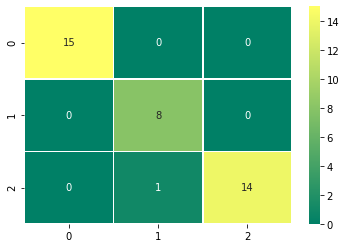

In [7]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
sns.heatmap(cm, annot=True,fmt="d",linewidths=.5, cmap="summer")
plt.show()

[Text(179.35714285714286, 199.32, 'X[2] <= 2.35\nentropy = 1.579\nsamples = 112\nvalue = [35, 42, 35]'),
 Text(155.44285714285715, 163.07999999999998, 'entropy = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(203.27142857142857, 163.07999999999998, 'X[3] <= 1.75\nentropy = 0.994\nsamples = 77\nvalue = [0, 42, 35]'),
 Text(119.57142857142857, 126.83999999999999, 'X[2] <= 5.05\nentropy = 0.433\nsamples = 45\nvalue = [0, 41, 4]'),
 Text(71.74285714285715, 90.6, 'X[0] <= 4.95\nentropy = 0.165\nsamples = 41\nvalue = [0, 40, 1]'),
 Text(47.82857142857143, 54.359999999999985, 'X[3] <= 1.35\nentropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(23.914285714285715, 18.119999999999976, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(71.74285714285715, 18.119999999999976, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(95.65714285714286, 54.359999999999985, 'entropy = 0.0\nsamples = 39\nvalue = [0, 39, 0]'),
 Text(167.4, 90.6, 'X[0] <= 6.05\nentropy = 0.811\nsamples = 4\nvalue = 

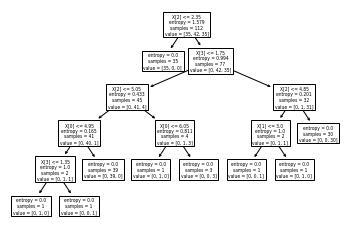

In [8]:
from sklearn import tree
tree.plot_tree(clf)

In [9]:
#Importing the accuracy metric from sklearn.metrics library

from sklearn.metrics import accuracy_score
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(X_train)))
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred))

Accuracy Score on train data:  1.0
Accuracy Score on test data:  0.9736842105263158


Next, we will tune the parameters of the decision tree to increase its accuracy. One of those parameters is 'min_samples_split', which is the minimum number of samples required to split an internal node. Its default value is equal to 2 because we cannot split on a node containing only one example/ sample.

In [10]:
clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=50)
clf.fit(X_train, y_train)

#Predicting labels on the test set.
y_pred =  clf.predict(X_test)

print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(X_train)))
print('Accuracy Score on the test data: ', accuracy_score(y_true=y_test, y_pred=clf.predict(X_test)))

Accuracy Score on train data:  0.9553571428571429
Accuracy Score on the test data:  0.9736842105263158


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

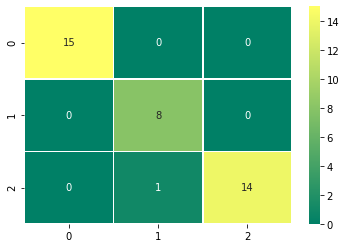

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
sns.heatmap(cm, annot=True,fmt="d",linewidths=.5, cmap="summer")
plt.show()

[Text(133.92000000000002, 181.2, 'X[2] <= 2.35\nentropy = 1.579\nsamples = 112\nvalue = [35, 42, 35]'),
 Text(66.96000000000001, 108.72, 'entropy = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[3] <= 1.75\nentropy = 0.994\nsamples = 77\nvalue = [0, 42, 35]'),
 Text(133.92000000000002, 36.23999999999998, 'entropy = 0.433\nsamples = 45\nvalue = [0, 41, 4]'),
 Text(267.84000000000003, 36.23999999999998, 'entropy = 0.201\nsamples = 32\nvalue = [0, 1, 31]')]

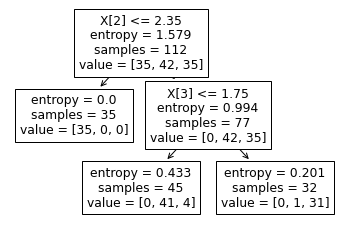

In [12]:
from sklearn import tree
tree.plot_tree(clf)

Install Graphiz and ensure it is added to systems path.

In [13]:
#Install graphiz first (e.g., through pip install)

#Then add it to the systems path
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin\dot.exe'

If you run into trouble installing Graphviz, check this:
https://stackoverflow.com/questions/35064304/runtimeerror-make-sure-the-graphviz-executables-are-on-your-systems-path-aft

Plot and saving the graphiz chart on your computer as a separate pdf file.

In [14]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
# graph
graph.render("iris") 

'iris.pdf'

Plotting with more options.

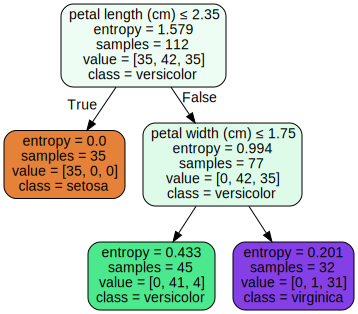

In [15]:
iris = load_iris()
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

Example with a real dataset.

In [16]:
# Import models and utility functions
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn import datasets

data = pd.read_csv("bank_data.csv", delimiter=";")
#data.head(2)

#Let's only choose a few variables to work for now
data = data[['age','balance','duration','y']]

#Recoding the y column as 1 and 0
data["y1"] = np.where(data["y"].str.contains("yes"), 1, 0)
data = data.loc[:, data.columns!='y']
data = data.rename(columns={'y1':'y'})

#Splitting data into train and test data
train, test = train_test_split(data, test_size=0.2, random_state=42)

# get independent variables
X_train = train[['age','balance','duration']]

# get response variables
y_train = train[['y']]
y_train = np.ravel(y_train) 


#Importing the Decision tree classifier from the sklearn library.
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy', random_state=0)

#Training the decision tree classifier. 
model.fit(X_train, y_train)

# #Predicting labels on the test set.
X_test = test[['age','balance','duration']]
y_test = test['y']
y_pred =  model.predict(X_test)

#Now we create the confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[712,  95],
       [ 70,  28]], dtype=int64)

In [17]:
columns = list(data.columns)
feature_names = columns[:-1]
#class_name = columns[3]


dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=feature_names,  
                                class_names=True,  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
#graph 

In [18]:
import graphviz 
dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=feature_names,  
                                class_names=True,  
                                filled=True, rounded=True,  
                                special_characters=True) 
graph = graphviz.Source(dot_data) 
# graph
graph.render("bank") 

'bank.pdf'

Useful resources:
- https://www.hackerearth.com/practice/machine-learning/machine-learning-algorithms/ml-decision-tree/tutorial/
- https://scikit-learn.org/stable/modules/tree.html